In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df=pd.read_csv("/Users/prathamsharma/Desktop/Projects/Project_1/Ecommerce_Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


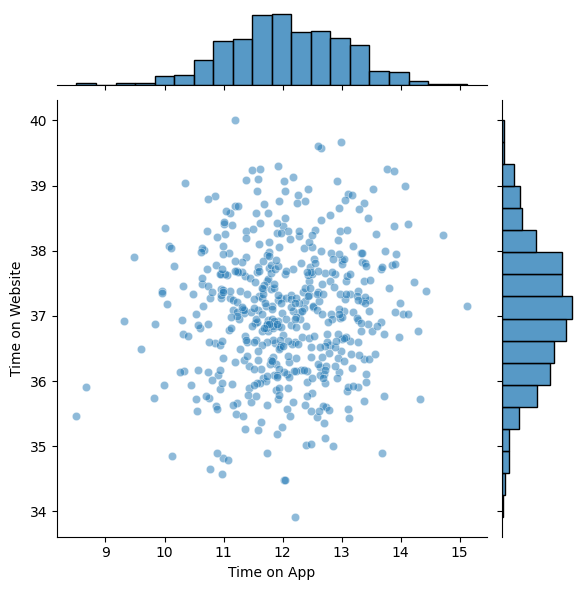

In [6]:
#EDA
sns.jointplot(x=df["Time on App"],y=df["Time on Website"],alpha=0.5)

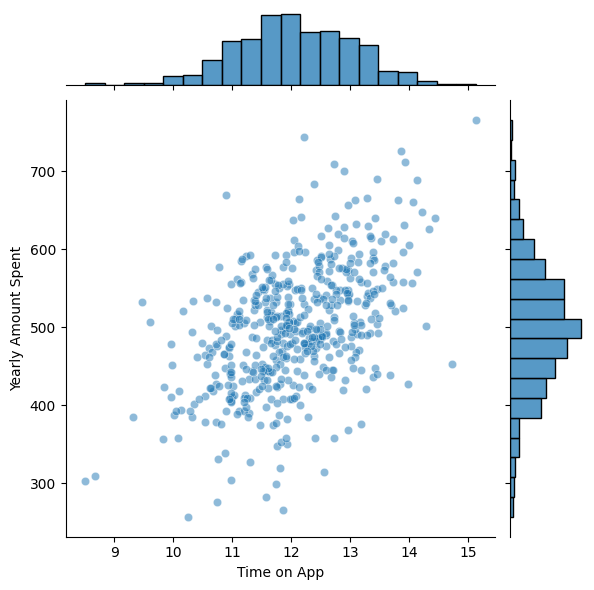

In [7]:
#EDA
sns.jointplot(x=df["Time on App"],y=df["Yearly Amount Spent"],alpha=0.5)

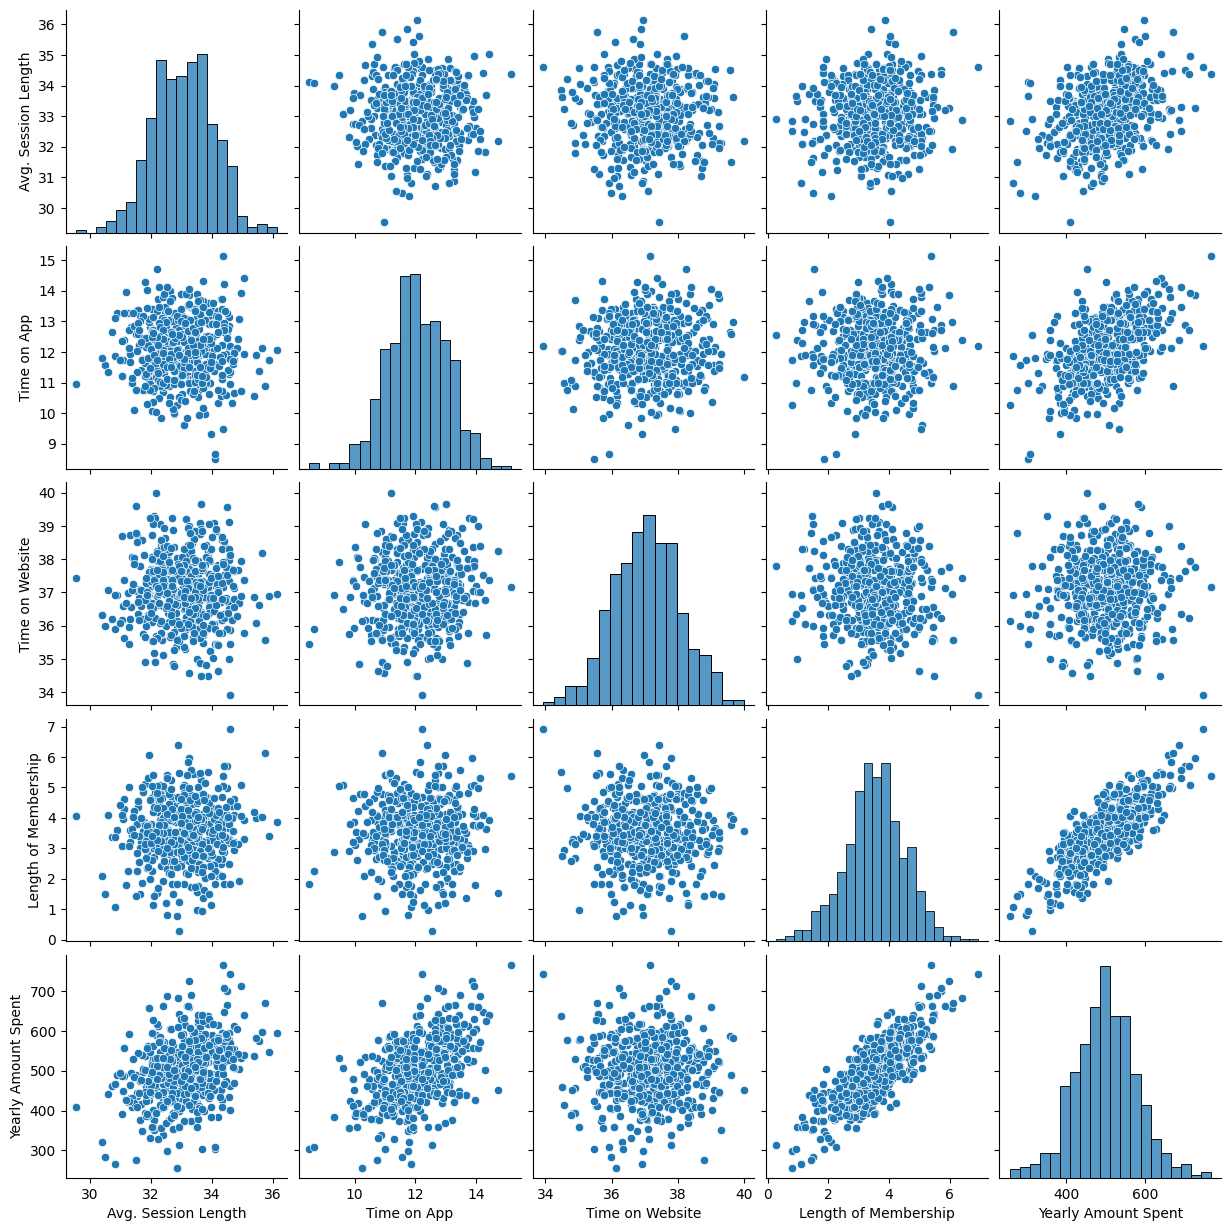

In [8]:
sns.pairplot(df,kind="scatter")

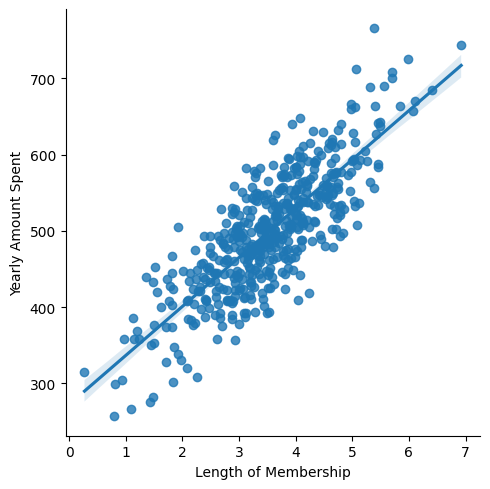

In [9]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df)

In [10]:
#Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [13]:
X.head()
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [15]:
#Training the Model with multivariable regression using Scikit Learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
# the coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [20]:
# r squared
lm.score(X, y)

0.9842821675307221

In [21]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [22]:
#Training the model with multivariable regression using OLS

In [23]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Mon, 23 Jun 2025   Prob (F-statistic):          3.46e-315
Time:                         18:15:53   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [24]:
#Predicting Test Data

In [25]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

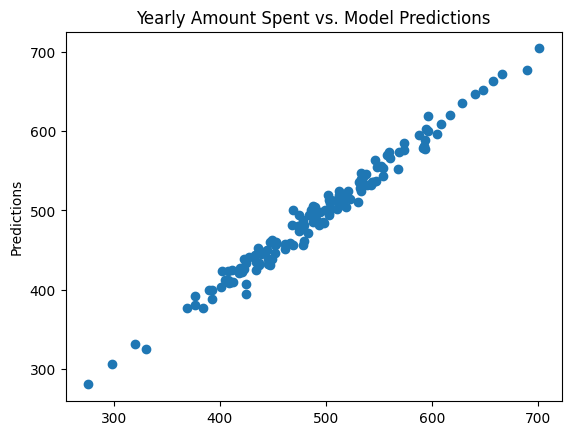

In [26]:
# Scatter plot of actual values of y vs predicted values.
plt.scatter(y_test, predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [27]:
#Evaluation of the model

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [29]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432086
Mean Squared Error: 103.91554136503301
Root Mean Squared Error: 10.193897260863139


In [30]:
#Residuals

/var/folders/km/pql1mrbj65jbf346hp94yd3h0000gn/T/ipykernel_5565/339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

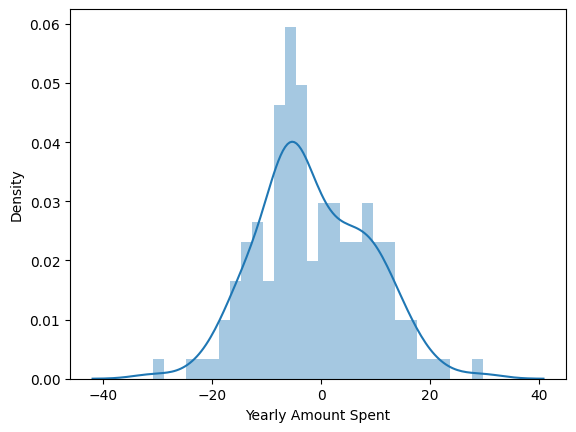

In [31]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

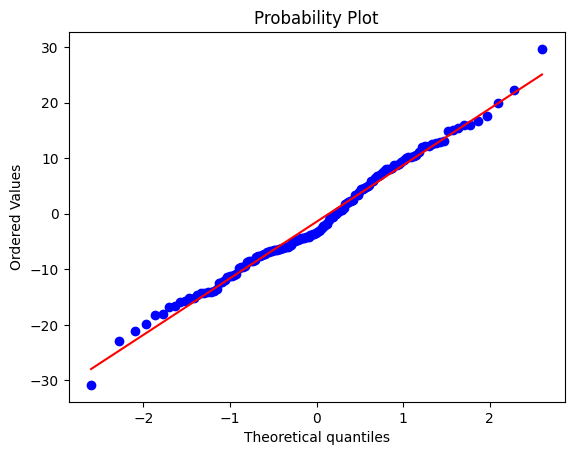

In [32]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [33]:
#CONCLUSION - Interpretation and Insights

In [34]:
"""
Interpreting the results of our regression analysis reveals some noteworthy patterns in customer behavior.
Surprisingly, the most significant factor influencing yearly spending is not the time spent on the app or 
the website, but rather the length of membership. This suggests that long-term customer engagement is a 
key driver of revenue.

Among the digital engagement channels, mobile app usage shows a far stronger correlation with spending 
compared to the desktop website. In fact, time spent on the desktop site appears to have little to no 
predictive value in terms of customer purchases. This implies that users interacting via the app are more 
likely to convert into paying customers, while desktop users may not be as engaged or may require a 
different strategy to drive sales.

There are two possible interpretations of this finding. One is that the desktop website experience might 
need improvement to better engage users and encourage purchases. Alternatively, it may reflect a broader 
behavioral trend: customers are generally more influenced by mobile app experiences when it comes to 
online shopping. In either case, this insight could help guide marketing and UX design strategies 
moving forward.

Ultimately, while domain expertise is necessary to act on these findings, our model effectively highlights 
the relative importance of each predictor, offering a strong foundation for further decision-making and 
optimization efforts.
"""


'\nInterpreting the results of our regression analysis reveals some noteworthy patterns in customer behavior.\nSurprisingly, the most significant factor influencing yearly spending is not the time spent on the app or \nthe website, but rather the length of membership. This suggests that long-term customer engagement is a \nkey driver of revenue.\n\nAmong the digital engagement channels, mobile app usage shows a far stronger correlation with spending \ncompared to the desktop website. In fact, time spent on the desktop site appears to have little to no \npredictive value in terms of customer purchases. This implies that users interacting via the app are more \nlikely to convert into paying customers, while desktop users may not be as engaged or may require a \ndifferent strategy to drive sales.\n\nThere are two possible interpretations of this finding. One is that the desktop website experience might \nneed improvement to better engage users and encourage purchases. Alternatively, it ma